# Notebook Goals

## This notebook will attempt to answer the first prompt provided by the dataset contributor.

### How many customers are spending more over time? Less over time? Describe these customers.
### Of those customers who are spending more over time, which categories are growing at a faster rate?

### To answer these questions we will use the four of the files provided:
        1. transaction data
        2. hh_demographic
        3. campaign_table
        4. campaign_desc
        
## Notebook Structure

1. The notebook will look at households that the dataset provides transaction and demographic data for. 

2. From there we will breakout the households out by age groups and income group. 

3. Plot Average Weekly Spending for all age and income groups.

4. Plot Average Weekly Spending for a specific demographic group: Age Group (15-34) and Income Group 50-74K. 

5. Chart the spending patterns of two specific households during the active adveristing campaigns.
  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset2/campaign_table.csv
/kaggle/input/dataset2/campaign_desc.csv
/kaggle/input/dataset2/transaction_data.csv
/kaggle/input/dataset2/hh_demographic.csv


# Load the Data

In [2]:
# loading the 4 csv files in dataset2 into process:
campaign_desc = pd.read_csv('/kaggle/input/dataset2/campaign_desc.csv')
transaction_data = pd.read_csv('/kaggle/input/dataset2/transaction_data.csv')
hh_demographic = pd.read_csv('/kaggle/input/dataset2/hh_demographic.csv')
campaign_table = pd.read_csv('/kaggle/input/dataset2/campaign_table.csv')



In [3]:
# transaction_data
transaction_data.head()
#type(transaction_data)
#transaction_data.info()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


# Job1. Finding households that have transaction data and demographic data available.

In [4]:
#  Get a list of all unique household keys in transaction_data
trans_data_hh_key_list = list(transaction_data.household_key.unique())

#  Get a list of all unique household keys in hh_demoographics
hh_demo_hh_key_list = list(hh_demographic.household_key.unique())

print(trans_data_hh_key_list, hh_demo_hh_key_list)

[2375, 1364, 1130, 1173, 98, 1172, 1060, 1351, 744, 212, 2052, 1287, 718, 2483, 1617, 240, 1843, 2305, 1916, 480, 271, 255, 985, 2371, 347, 216, 1913, 293, 2324, 1345, 1016, 122, 1238, 1828, 1377, 2105, 315, 1289, 2095, 2192, 593, 2110, 2362, 2044, 2336, 924, 432, 1116, 304, 1629, 2009, 1490, 343, 34, 1929, 827, 568, 575, 2473, 14, 474, 1123, 1558, 2352, 361, 681, 630, 585, 2141, 2018, 2218, 2397, 364, 381, 68, 245, 528, 698, 2427, 2089, 926, 1590, 614, 1096, 1466, 778, 1483, 77, 887, 1633, 1723, 1371, 2328, 287, 100, 1241, 1745, 1258, 965, 529, 687, 2327, 1549, 907, 294, 1316, 2116, 1652, 2200, 401, 1704, 1861, 175, 1584, 2185, 1426, 1601, 2263, 114, 1026, 332, 693, 999, 536, 519, 650, 467, 1917, 93, 2205, 372, 2008, 932, 789, 105, 340, 1878, 796, 2058, 1655, 1138, 70, 791, 1733, 676, 2448, 1412, 947, 2317, 427, 1551, 437, 365, 2102, 1689, 1380, 1107, 851, 1083, 1432, 454, 2247, 1467, 2319, 451, 64, 2104, 1184, 2257, 1228, 2223, 1284, 1438, 2478, 2482, 1145, 314, 1789, 1852, 988, 223,

In [7]:
## A function to find common items in two lists of a and b:

def common_member(a, b): 
    """A function to find the common items in two lists."""
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        return list((a_set & b_set))
    else: 
        print("No common elements")


In [8]:
#  Create a list of unique household keys that transaction data AND demographic data is avaliable for.
trans_data_and_hh_demo_hh_keys_list = common_member(trans_data_hh_key_list, hh_demo_hh_key_list)

#  Print the length of the list so we know the amount of household we have avaliable data for
print("We have transaction AND demongraphic common data on total " + str(len(trans_data_and_hh_demo_hh_keys_list)) + " households.")


We have transaction AND demongraphic common data on total 801 households.


In [9]:
# show the 801 key info in details:
print(trans_data_and_hh_demo_hh_keys_list)

[1, 2050, 2053, 7, 8, 2057, 2058, 13, 2062, 2063, 16, 17, 18, 19, 20, 2064, 22, 2068, 2069, 25, 2070, 27, 2076, 31, 2082, 2084, 2085, 2086, 39, 40, 2087, 42, 43, 2088, 2092, 46, 2094, 48, 49, 2097, 52, 2100, 2102, 55, 56, 57, 58, 2107, 2110, 2111, 2112, 67, 2115, 2116, 71, 2119, 2121, 74, 2123, 2124, 77, 78, 80, 2129, 2130, 85, 86, 2133, 2134, 2140, 97, 98, 2147, 2148, 101, 104, 105, 2154, 2156, 109, 110, 2158, 113, 114, 2162, 117, 118, 119, 2168, 121, 123, 2172, 2173, 127, 131, 2179, 133, 134, 2181, 136, 2182, 2183, 139, 2184, 2185, 2186, 2188, 2190, 2193, 2194, 149, 2198, 2199, 2200, 155, 2203, 157, 158, 159, 2208, 161, 2209, 164, 165, 166, 2217, 170, 2221, 2224, 178, 2231, 184, 2233, 2234, 2235, 2237, 192, 193, 2243, 198, 201, 2250, 2252, 2254, 208, 209, 211, 212, 2260, 214, 216, 2264, 218, 219, 220, 221, 222, 2266, 2269, 2272, 230, 2279, 232, 2280, 2282, 235, 2284, 239, 242, 243, 2292, 2294, 2295, 248, 249, 250, 2296, 2298, 253, 2300, 2302, 256, 257, 2305, 2307, 263, 264, 2312, 231

## Quick look at the transaction data

In [ ]:
transaction_data.head()

## Quick look at the household demographics data

In [ ]:
# hh_demographic.dtypes
hh_demographic.head()

### Transaction Data and Household Demographics Notes:

Both data sets share a common column value the household keys. 

Each household having a varying number of transaction (represented by the different basket_id) and each basket containing a different set of products.

The following code will group the transaction_data by household_key and basket_ID. It the sums the total sales value of each transaction.

In [10]:
trans_data_baskets_hh_key = pd.DataFrame(transaction_data.groupby(['household_key', 'BASKET_ID']).sum()).drop(['DAY', 'PRODUCT_ID','QUANTITY', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO', 'COUPON_DISC', 'COUPON_MATCH_DISC'], axis=1)
trans_data_baskets_hh_key = trans_data_baskets_hh_key.merge(transaction_data.drop(['SALES_VALUE', 'PRODUCT_ID', 'QUANTITY', 'RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'], axis=1), on="BASKET_ID").drop_duplicates(subset=['BASKET_ID'])
# trans_data_baskets_hh_key
trans_data_baskets_hh_key.head()

,BASKET_ID,SALES_VALUE,household_key,DAY,STORE_ID,TRANS_TIME,WEEK_NO
0,27601281299,78.66,1,51,436,1456,8
30,27774192959,41.10,1,67,436,2002,10
42,28024266849,26.90,1,88,436,1604,13
54,28106322445,63.43,1,94,436,1937,14
77,28235481967,53.45,1,101,436,1603,15


### Merging this transaction (grouped by household_key and basket_ID) with demogrpahic data

Since the transaction data provides a household key with each basket_id, we can match household demographic data to each transaction basket using the follwing block of code.


In [12]:
spend_demo_data = trans_data_baskets_hh_key.merge(hh_demographic, on='household_key')
spend_demo_data.head() # spend_demo_data will be used as the job2 dataset!

# show the householder QTY in spend_demo_data dataframe:
len(list(spend_demo_data.household_key.unique())) # 801

801

# Job 2. Sorting Spending Demographic Data by Age Group and Income Group

The following blocks of code finds the unique age groups and income groups listed under the AGE_DESC and INCOME_DESC columns, respectively, in the spend_demo_data set and creates individual dataframes for each age and income group.

In [13]:
#  Get the unique age_groups in AGE_DSC
age_groups = sorted(list(spend_demo_data.AGE_DESC.unique()))
print("The different age_group buckets in the dataset are " + str(age_groups) + ".")

# Create empty list of to store dataframes
age_group_spending_dfs = []

# append each individual age group dataframe to the list
for group in age_groups:
    age_group_spending_dfs.append(spend_demo_data[spend_demo_data['AGE_DESC'] == group])
    
    
# Group and Name the Transaction Spending DataFrames by Age Group x 6:
age_19_24 = age_group_spending_dfs[0]
age_25_34 = age_group_spending_dfs[1]
age_35_44 = age_group_spending_dfs[2]
age_45_54 = age_group_spending_dfs[3]
age_55_64 = age_group_spending_dfs[4]
age_65 = age_group_spending_dfs[5]

# show the list of containing 6 x  whole age df:
age_group_spending_dfs

# show the type of dataframe:age_25_34 info:
type(age_25_34)

The different age_group buckets in the dataset are ['19-24', '25-34', '35-44', '45-54', '55-64', '65+'].


pandas.core.frame.DataFrame

In [14]:
# show the dataframe of targeted age group:
age_25_34 

,BASKET_ID,SALES_VALUE,household_key,DAY,STORE_ID,TRANS_TIME,WEEK_NO,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
50,27757099033,270.74,8,65,321,2149,10,25-34,U,25-34K,Unknown,2 Adults Kids,3,1
51,27950185083,18.01,8,81,31582,718,12,25-34,U,25-34K,Unknown,2 Adults Kids,3,1
52,28009475902,26.95,8,86,321,1201,13,25-34,U,25-34K,Unknown,2 Adults Kids,3,1
53,28235573550,18.66,8,101,321,1724,15,25-34,U,25-34K,Unknown,2 Adults Kids,3,1
54,28243808412,17.30,8,105,321,1920,16,25-34,U,25-34K,Unknown,2 Adults Kids,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54906,31184707464,96.10,2499,283,447,1855,41,25-34,U,Under 15K,Unknown,2 Adults Kids,3,1
54907,31225577030,6.48,2499,286,447,1809,42,25-34,U,Under 15K,Unknown,2 Adults Kids,3,1
54908,31343685123,17.28,2499,293,31782,818,43,25-34,U,Under 15K,Unknown,2 Adults Kids,3,1
54909,31390081459,52.00,2499,297,406,1239,43,25-34,U,Under 15K,Unknown,2 Adults Kids,3,1


In [15]:
#  Get the unique age_groups in INCOME_DESC
income_groups = sorted(list(spend_demo_data.INCOME_DESC.unique()))
print("The different income buckets in the dataset are " + str(income_groups) + ".")

# Create empty list of to store dataframes
income_group_spending_dfs = []

# append each individual age group dataframe to the list
for group in income_groups:
    income_group_spending_dfs.append(spend_demo_data[spend_demo_data['INCOME_DESC'] == group])
    

#  Group and Name the Transaction Spending DataFrames by Income Group
inc_100_124K = income_group_spending_dfs[0]
inc_125_149K = income_group_spending_dfs[1]
inc_15_24K = income_group_spending_dfs[2]
inc_150_174K = income_group_spending_dfs[3]
inc_175_199K = income_group_spending_dfs[4]
inc_200_249K = income_group_spending_dfs[5]
inc_25_34K = income_group_spending_dfs[6]
inc_250K = income_group_spending_dfs[7]
inc_35_49K = income_group_spending_dfs[8]
inc_50_74K = income_group_spending_dfs[9]
inc_75_99K = income_group_spending_dfs[10]
inc_Under_15K = income_group_spending_dfs[11]

# show the list of whole income df x 12:
income_group_spending_dfs

# show the age_xxx info:
type(inc_50_74K)


The different income buckets in the dataset are ['100-124K', '125-149K', '15-24K', '150-174K', '175-199K', '200-249K', '25-34K', '250K+', '35-49K', '50-74K', '75-99K', 'Under 15K'].


pandas.core.frame.DataFrame

In [16]:
# show the dataframe of targeted income group:
inc_50_74K

,BASKET_ID,SALES_VALUE,household_key,DAY,STORE_ID,TRANS_TIME,WEEK_NO,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
32,27255010658,82.97,7,23,322,1435,4,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
33,27266821687,3.34,7,24,359,1711,4,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
34,27353377196,107.72,7,33,322,2140,5,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
35,27505412356,12.88,7,44,359,1935,7,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
36,28057332080,11.97,7,90,359,1753,14,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54863,31818536180,1.79,2498,324,309,1704,47,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
54864,31818916149,28.64,2498,324,433,1339,47,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
54865,31832791118,6.95,2498,325,309,1606,47,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
54866,31833405779,37.33,2498,326,309,1338,47,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown


# Job 3. Plotting Weekly Spending by Age (25-34) and Income Group (50-74K):

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


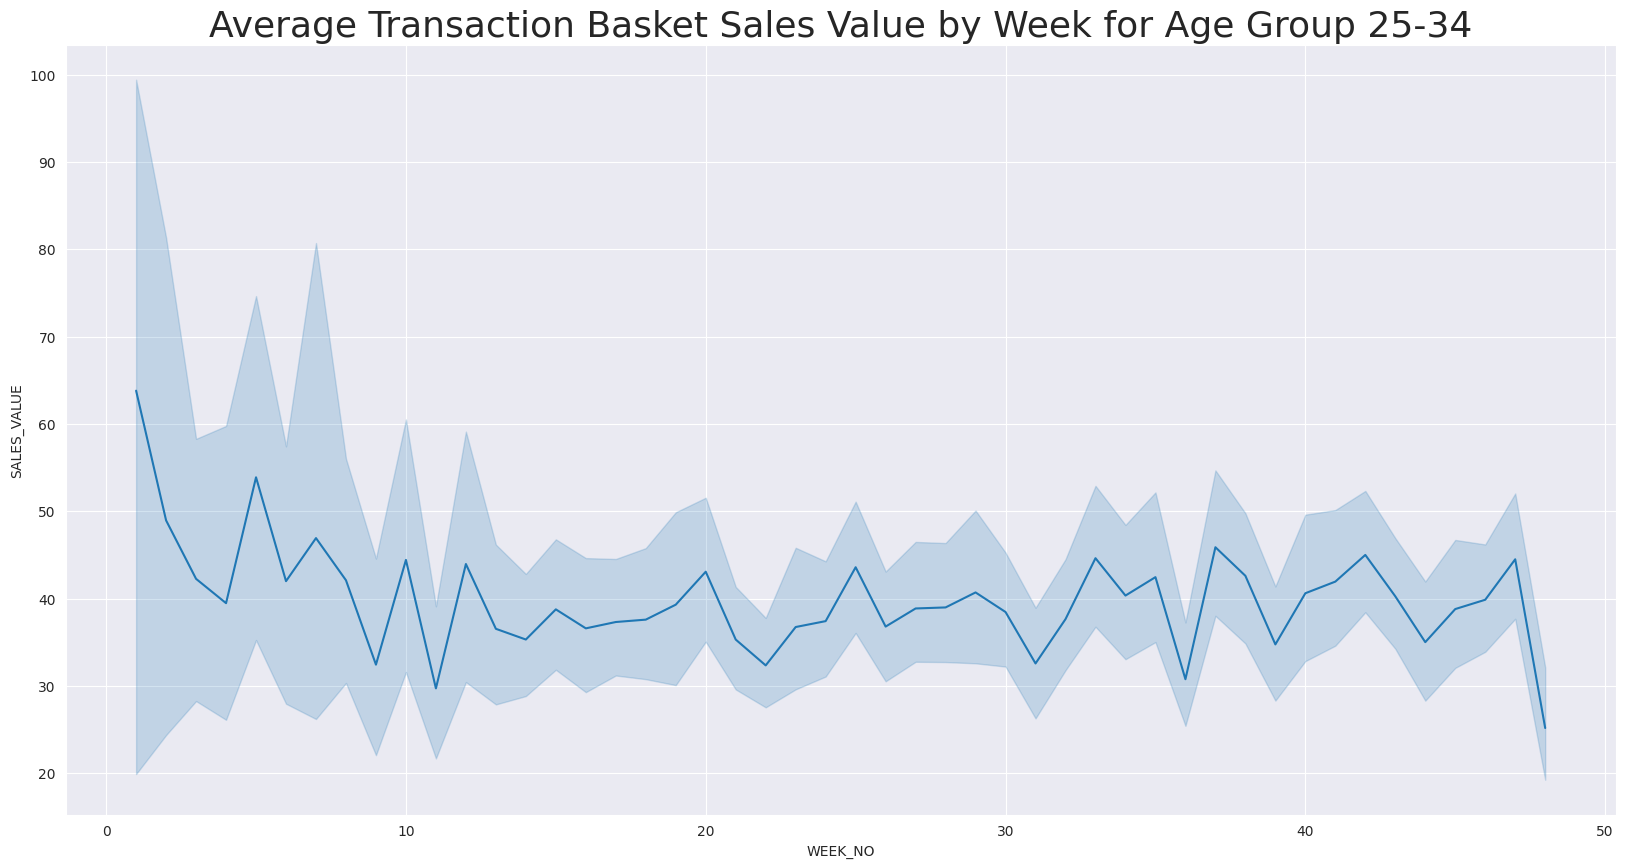

In [17]:
# Weekly Spending By Age Group of 25-34:
sns.set_style("darkgrid")

avg_weekly_sales_25_34 = age_25_34[['WEEK_NO', 'SALES_VALUE', 'household_key']].groupby(['WEEK_NO', 'household_key']).mean().reset_index()
plt.figure(figsize=(20,10))
plt.title("Average Transaction Basket Sales Value by Week for Age Group 25-34", size=26)
ax = sns.lineplot(x='WEEK_NO', y='SALES_VALUE',
                  data=avg_weekly_sales_25_34,
                  markers=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


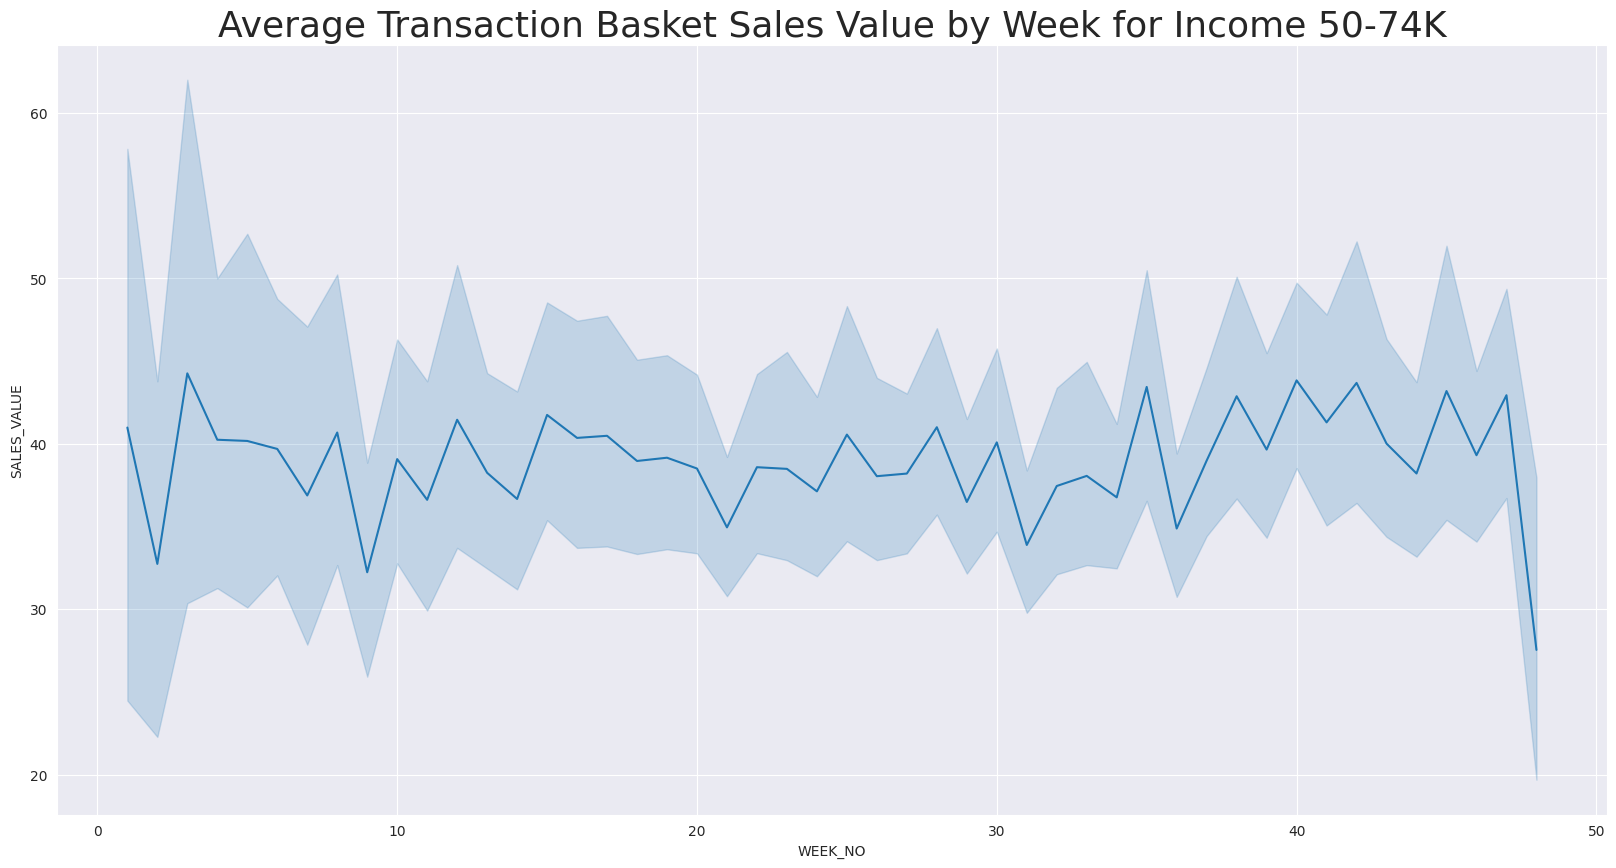

In [18]:
# Weekly Spending By Income Group of 50-74K:
sns.set_style("darkgrid")

avg_weekly_sales_inc_50_74K = inc_50_74K[['WEEK_NO', 'SALES_VALUE', 'household_key']].groupby(['WEEK_NO', 'household_key']).mean().reset_index()
plt.figure(figsize=(20,10))
plt.title("Average Transaction Basket Sales Value by Week for Income 50-74K", size=26)
ax = sns.lineplot(x='WEEK_NO', y='SALES_VALUE',
                  data=avg_weekly_sales_inc_50_74K,
                  markers=True)

# Job 4. Plot Average Weekly Spending for a specific demographic group: Age Group (25-34) and Income Group 50-74K.

Previously we plotted the average weekly spending for age of (25-34) and income group of (50-74K) separately, but we can further filter and subset the data avaliable to see average weekly spending by specific age and income groups, namely households aged 25-34 in the income group of 50-74K/year.

Additionally we can use the campaign_desc and campaign_table datasets to determine the top ad campaigns that reached our target demographic group to see if spending patterns changed during the campaigns.

## Finding the households that meet our target demographic.

The boolean check will return our households match from both age (25-34)  and income (50-74K) dataframes.

With the list household keys we've generated we can then filter the spending demographic dataframe for those specific households.


In [19]:
# check the household_key in both dataframes:
print(sorted(inc_50_74K[inc_50_74K['AGE_DESC'] == '25-34'].household_key.unique()) == sorted(age_25_34[age_25_34['INCOME_DESC'] == '50-74K'].household_key.unique()))

# household_key list in both dataframes:
hh_keys_age_25_34_inc_50_74K = list(age_25_34[age_25_34['INCOME_DESC'] == '50-74K'].household_key.unique())

# show the household_key list of both Age Group (25-34) and Income Group (50-74K) = targeted demographic:
hh_keys_age_25_34_inc_50_74K

target_demo_1 = spend_demo_data[spend_demo_data['household_key'].isin(hh_keys_age_25_34_inc_50_74K)]
target_demo_1.head()
target_demo_1 # the dataframe containing Age Group (25-34) and Income Group 50-74K


True


,BASKET_ID,SALES_VALUE,household_key,DAY,STORE_ID,TRANS_TIME,WEEK_NO,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
3588,27637215343,10.00,166,55,447,1055,9,25-34,A,50-74K,Homeowner,2 Adults Kids,3,1
3589,27649217252,11.58,166,56,447,2034,9,25-34,A,50-74K,Homeowner,2 Adults Kids,3,1
3590,27744966210,12.00,166,64,447,1557,10,25-34,A,50-74K,Homeowner,2 Adults Kids,3,1
3591,28069172381,6.98,166,91,447,2218,14,25-34,A,50-74K,Homeowner,2 Adults Kids,3,1
3592,28154032081,14.04,166,97,447,1949,15,25-34,A,50-74K,Homeowner,2 Adults Kids,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54863,31818536180,1.79,2498,324,309,1704,47,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
54864,31818916149,28.64,2498,324,433,1339,47,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
54865,31832791118,6.95,2498,325,309,1606,47,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
54866,31833405779,37.33,2498,326,309,1338,47,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown


## Finding matching campaigns with campaign_desc and campaign_table

We can also use the list of household keys with the campaign_desc and campaign_table dataframes to find the campaigns that reached our target demographic group. 

The campaign_desc data frame include the start and end in days but we can create new features for the start and end week of each campaign.

### Campaign_table

Using the previously created list of household keys for our target demographic, we can find the top 5 campaigns that reached those households.

With the top 3 campaigns, we can use campaign_desc to find the start and end of each campaign

In [20]:
#  Find the campaigns that reached our target demographic of both age_25_34 & inc_50_74K
demo_campaigns1 = campaign_table[campaign_table['household_key'].isin(hh_keys_age_25_34_inc_50_74K)]

#  Find the top three campaigns that targeted households in our list
demo_campaigns1.CAMPAIGN.value_counts().head(3)


CAMPAIGN
18    29
13    27
8     24
Name: count, dtype: int64

In [21]:
# show the top 3 campaign records:

campaign_18 = campaign_desc[campaign_desc['CAMPAIGN'] == 18]
campaign_13 = campaign_desc[campaign_desc['CAMPAIGN'] == 13]
campaign_8 = campaign_desc[campaign_desc['CAMPAIGN'] == 8]

campaign_18
campaign_13
campaign_8


,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
17,TypeA,8,412,460


### Plotting Weekly Spend For the Target Demographic During the Top Three Ad Campaigns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyError: 'START_WEEK'

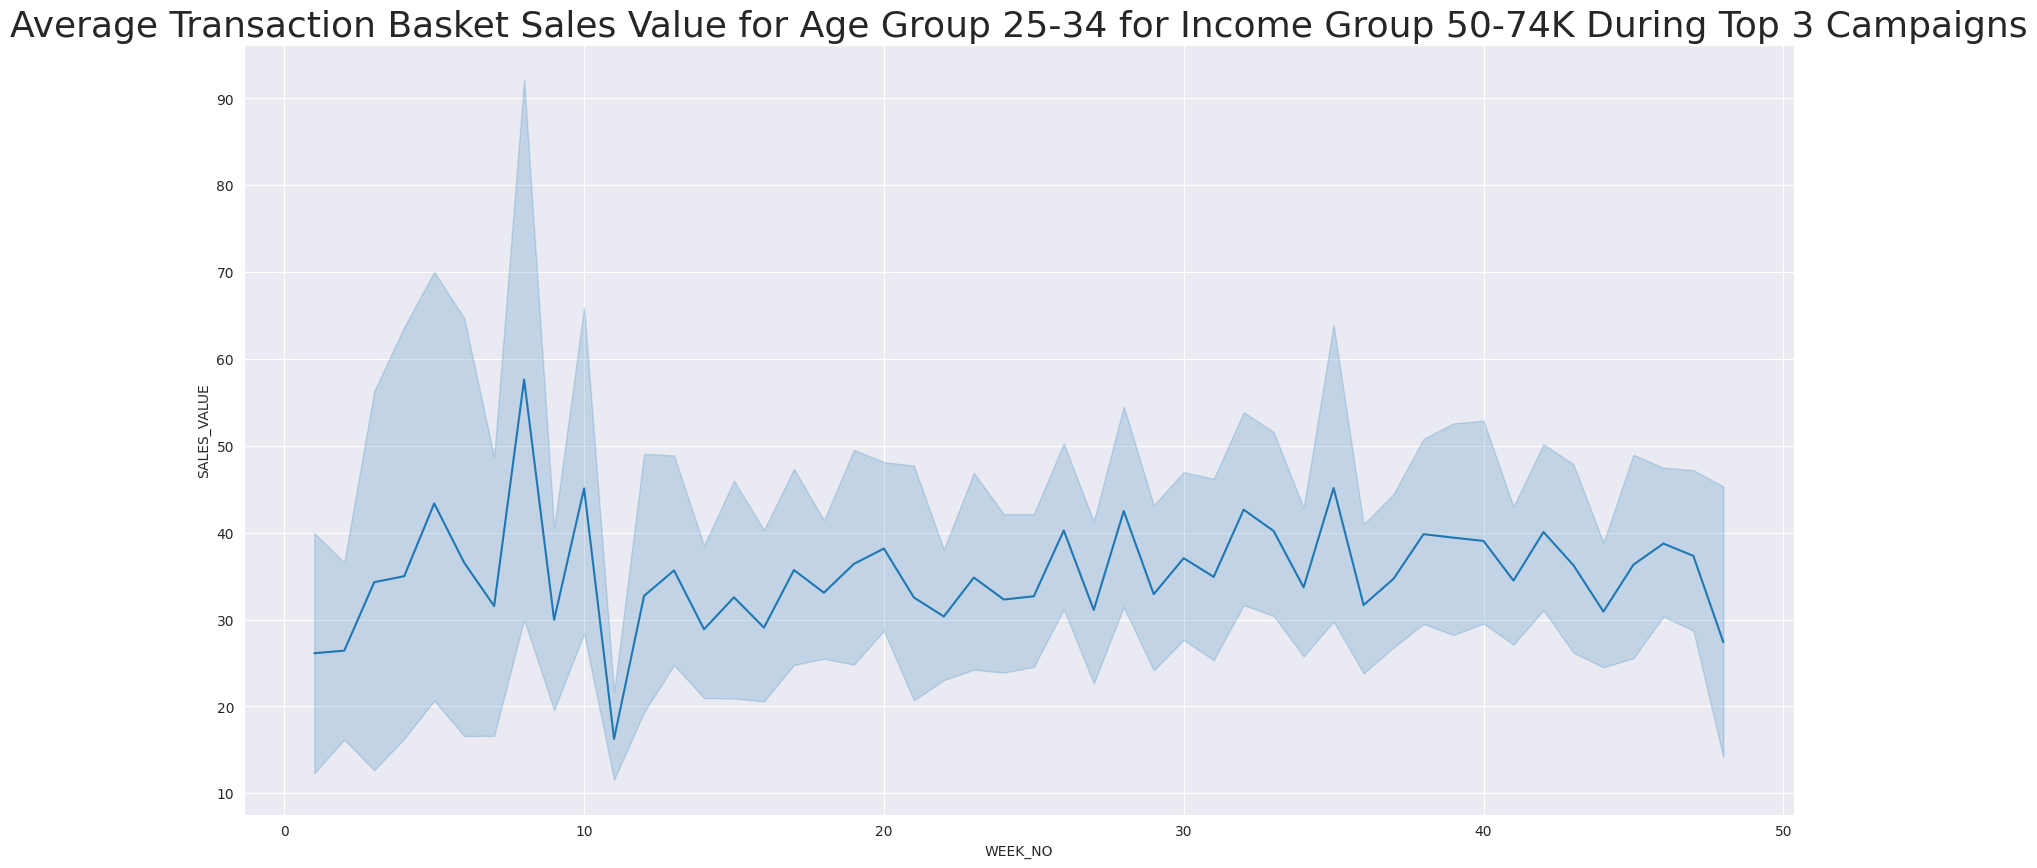

In [22]:
plt.figure(figsize=(20,10))
plt.title("Average Transaction Basket Sales Value for Age Group 25-34 for Income Group 50-74K During Top 3 Campaigns", size=26)

ax = sns.lineplot(x='WEEK_NO', y='SALES_VALUE',
                  data=target_demo_1,
                  markers=True)

campaign_18_active = np.arange(int(campaign_18['START_WEEK']), int(campaign_18['END_WEEK']))
campaign_13_active = np.arange(int(campaign_13['START_WEEK']), int(campaign_13['END_WEEK']))
campaign_8_active = np.arange(int(campaign_8['START_WEEK']), int(campaign_8['END_WEEK']))
y = target_demo_1.SALES_VALUE.max()

ax.fill_between(campaign_18_active, y, facecolor='purple', alpha=0.3, label='Ad Campaign 18')
ax.fill_between(campaign_13_active, y, facecolor='green', alpha=0.3, label='Ad Campaign 13')
ax.fill_between(campaign_8_active, y, facecolor='yellow', alpha=0.3, label='Ad Campaign 8')

ax.set_xlabel('Week', fontsize=22)
ax.set_ylabel('Sales Value ($)', fontsize=22)
ax.tick_params(axis="x", labelsize=18)
ax.tick_
params(axis="y", labelsize=18)
plt.legend()


### Ad Campaign Notes: 

With the plot above, it does not appear that ad campaigns 18, 13, and 8 were succesful in increasing average weekly spend for the demographic group that we are looking at. 

However it is important to note that ad campaigns 18, 13, and 8 may not specifically targeted our demographic group. We can only say that campaigns 18, 13, and 8 were the most successful at reaching households in the demographic group aged 25-34 making 50-74K.


# Job 5. Plotting Spending Patterns of the Two Specific Households From the Target Demographic with top 2 Ad Campaigns

Below we've printed the first two households from our list of hh_key that fall into the target demographic. Using the data we plot the spending patterns of these two households along active ad campaigns that reached them. 

In [23]:
# show the first 2 house key info on the targeted demographic dataframe:
print(hh_keys_age_25_34_inc_50_74K[0:2])

[166, 256]


## Household 166

Using the campaign data avaliable we can see that ad campaigns 13 and 8 were successful in reaching this household AND that there was a marked increased in weekly spending during the two campaigns.

In [24]:
hh_key_166 = target_demo_1[target_demo_1['household_key'] == 166]
campaign_table[campaign_table['household_key'] == 166]

#hh_key_166

,DESCRIPTION,household_key,CAMPAIGN
2795,TypeA,166,13
3917,TypeA,166,18


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


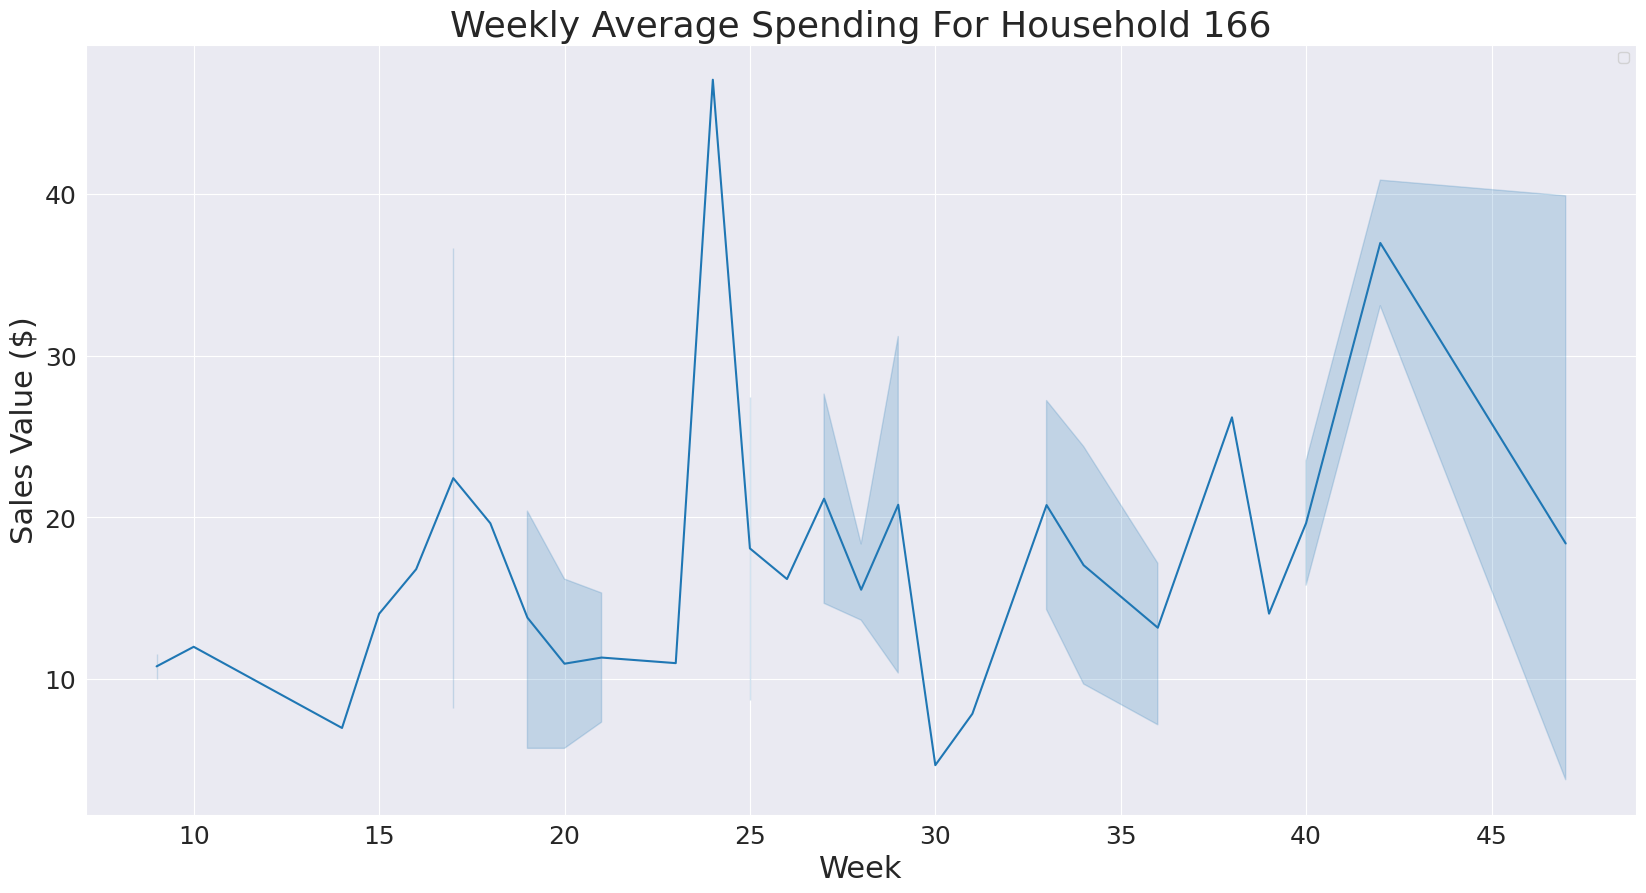

In [25]:
plt.figure(figsize=(20,10))
plt.title("Weekly Average Spending For Household 166", size=26)

ax = sns.lineplot(x='WEEK_NO', y='SALES_VALUE',
                  data=hh_key_166,
                  markers=True)

ax.set_xlabel('Week', fontsize=22)
ax.set_ylabel('Sales Value ($)', fontsize=22)
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.legend()

## Household 256

Using the ad campaign data we can see that household 256 was reached by 12 different ad campaigns and had a average weekly spending higher than 166.


In [26]:
hh_key_256= target_demo_1[target_demo_1['household_key'] == 256]
campaign_table[campaign_table['household_key'] == 256]

#hh_key_256

,DESCRIPTION,household_key,CAMPAIGN
311,TypeA,256,26
686,TypeA,256,30
738,TypeA,256,8
1845,TypeA,256,13
2918,TypeA,256,18
4425,TypeB,256,7
5477,TypeB,256,16
5632,TypeB,256,17
6069,TypeB,256,22
6465,TypeB,256,25


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


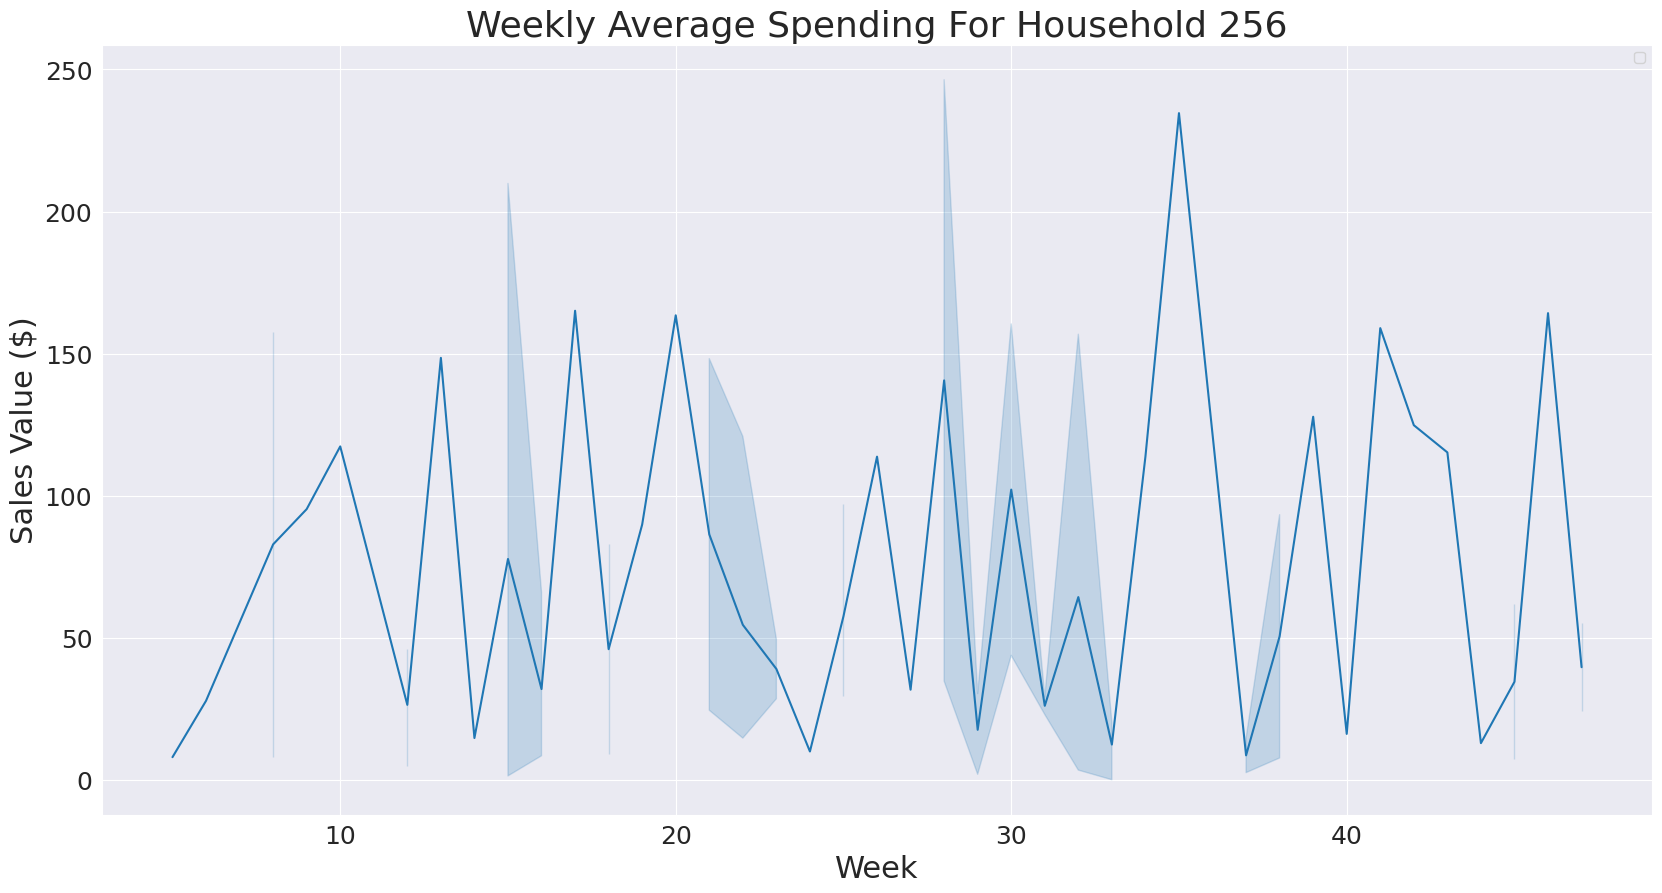

In [27]:
plt.figure(figsize=(20,10))
plt.title("Weekly Average Spending For Household 256", size=26)

ax = sns.lineplot(x='WEEK_NO', y='SALES_VALUE',
                  data=hh_key_256,
                  markers=True)

ax.set_xlabel('Week', fontsize=22)
ax.set_ylabel('Sales Value ($)', fontsize=22)
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.legend()


# Conclusion

The notebook has only consisted of EDA on weekly spending by specific demographic groups and households during active campaigns.

Thanks for your time!